Шаг 1. Загрузка данных, проверка пропусков, кодирование

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("athletes.csv")
df

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [8]:
df = df[~(df['dob'].isna())]
df = df[~(df['height'].isna())]
df = df[~(df['weight'].isna())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [9]:
df['sex_status'] = np.where(df['sex'] == 'male', 0, 1)
df

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,sex_status
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,1
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,0
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0,1
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0,1
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0,0


In [15]:
selectedColumns = df[['height', 'weight', 'sport']]
X = pd.get_dummies(selectedColumns, columns = ['sport'] )
y = pd.Series(data=df['sex_status'])
X.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Шаг 2. Разделение выборки на обучающую и тестовую

In [17]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [20]:
predictions = model.predict_proba(X_test)
predictions[:2]

array([[0.71410051, 0.28589949],
       [0.93548051, 0.06451949]])

In [22]:
model.score(X_train, y_train)

0.8153350218742804

In [23]:
model.score(X_test, y_test)

0.8103130755064457

Шаг 3. Построение ROC-кривой с помощью функции sklearn.metrics.roc_curve

(0.0, 0.0, 1.999809427317729)
(0.0, 0.0010162601626016261, 0.9998094273177289)
(0.0, 0.011178861788617886, 0.9912912804082902)
(0.0, 0.013211382113821139, 0.9907443483226673)
(0.0, 0.01524390243902439, 0.9892294755114952)
(0.0008417508417508417, 0.01524390243902439, 0.9888029106337907)
(0.0008417508417508417, 0.02032520325203252, 0.9868873363593644)
(0.0008417508417508417, 0.022357723577235773, 0.9865967781466839)
(0.0008417508417508417, 0.04065040650406504, 0.9804414824914315)
(0.0016835016835016834, 0.04065040650406504, 0.9803866491746365)


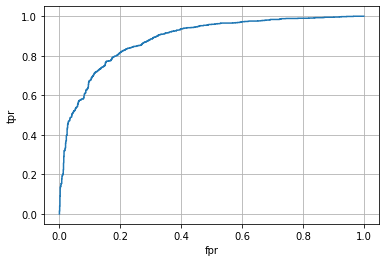

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()

Шаг 4. Вычисление значения ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions[:, 1])

0.8860312987599573

Шаг 5. Подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn

In [29]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], y_test):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [30]:
tp, fp, fn, tn

(781, 209, 203, 979)

In [32]:
recall_tpr = tp/(tp+fn)
recall_tpr

0.7936991869918699

In [33]:
fpr = fp/(fp+tn)
fpr

0.17592592592592593

Шаг 6. Построение ROC-кривой с помощью вычисленных в шаге 5 метрик: объедините графики из шага 3 и шага 6 в один

In [72]:
thres_list = sorted(set(predictions[:, 1]))
roc_curve_calc = pd.DataFrame(columns=['precision','fpr','tpr','thres'])
for thres in thres_list:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    predictions = model.predict_proba(X_test)
    for predicted_prob, actual in zip(predictions[:, 1], y_test):    
        if predicted_prob >= thres:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    roc_curve_calc = roc_curve_calc.append({'precision': tp/(tp+fp),'fpr': fp/(fp+tn), 'tpr':tp/(tp+fn), 'thres': thres}, ignore_index=True)
    
roc_curve_calc.head()

,precision,fpr,tpr,thres
0,0.453039,1.000000,1.0,0.000078
1,0.453247,0.999158,1.0,0.000096
2,0.453456,0.998316,1.0,0.000113
3,0.453665,0.997475,1.0,0.000151
4,0.453875,0.996633,1.0,0.000164


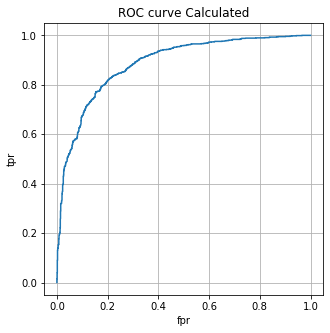

In [80]:
import matplotlib.pyplot as plt
plt.plot(roc_curve_calc.fpr, roc_curve_calc.tpr)
plt.title('ROC curve Calculated')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.rcParams['figure.figsize'] = [5, 5]

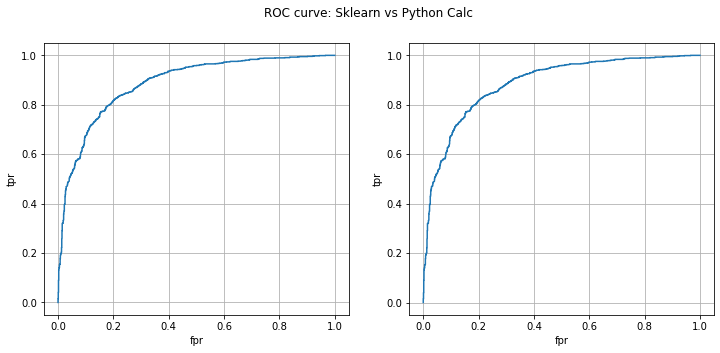

In [78]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('ROC curve: Sklearn vs Python Calc')
ax1.plot(fpr, tpr)
ax1.grid()
ax1.set_xlabel('fpr')
ax1.set_ylabel('tpr')
ax2.plot(roc_curve_calc.fpr, roc_curve_calc.tpr)
ax2.grid()
ax2.set_xlabel('fpr')
ax2.set_ylabel('tpr')
plt.rcParams['figure.figsize'] = [12, 5]

Шаг 7. Построение графика Precision-Recall, используя метрики, посчитанные в шаге 5

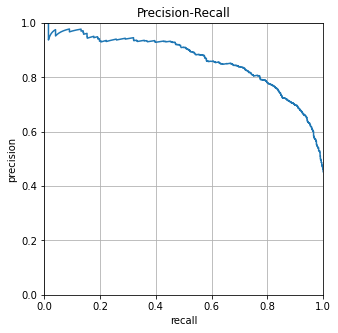

In [89]:
import matplotlib.pyplot as plt
plt.plot(roc_curve_calc.tpr, roc_curve_calc.precision)
plt.title('Precision-Recall')
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.rcParams['figure.figsize'] = [5, 5]

Шаг 8. Вычисление значения ROC-AUC метрики, используя метрики, посчитанные в шаге 5
Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).

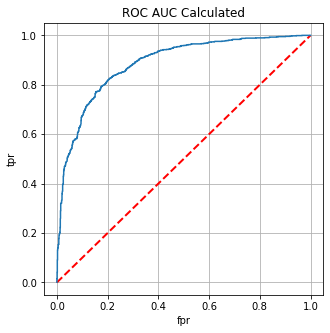

In [133]:
import matplotlib.pyplot as plt
plt.plot([0,1], [0,1], color='r', linestyle='--', linewidth=2)
plt.plot(roc_curve_calc.fpr, roc_curve_calc.tpr)
plt.title('ROC AUC Calculated')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.rcParams['figure.figsize'] = [5, 5]

In [135]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8860312987599573

Шаг 9. Сформулируйте выводы по проделанной работе:
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
b. *может ли ROC-кривая проходить ниже диагонали?

Учитывая полученную высокую точность на обучающей и тестовой выборках, можно сделать вывод, что модель хорошо может предсказать пол спортсмена, исходя из веса, роста и вида спорта. Сравнивая расчитанные метрики ROC AUC, PR AUC можно сказать, что модель будет точна как для сбалансированных, так и для несбалансированных классов в датасете.
ROC-кривая может проходить ниже диагонали, но в этом случае предсказанные значения с большой вероятностью не ассоциируются с классом, который мы определяем. Другими словами эта ситуация обратная той, в которой кривая находится над диагональю.